In [5]:

import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
print(sklearn.__version__ )

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

# TensorFlow ≥2.0 is required
import tensorflow as tf
print(tf.__version__)

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ann"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")


0.22
2.0.0


In [6]:
import tensorflow

In [7]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

In [8]:
iris = load_iris()
X = iris.data[:,(2,3)]
y = (iris.target == 0).astype(np.int)

In [9]:
per_clf = Perceptron()
per_clf.fit(X,y)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [10]:
ypred = per_clf.predict([[2,0.5]])

In [11]:
from tensorflow import keras

In [16]:
fmnits = keras.datasets.fashion_mnist

In [17]:
(X_train_full,y_train_full),(X_test,y_test) = fmnits.load_data()

4423680/4422102 [==============================] - 4s 1us/step


In [30]:
print(X_train_full.shape,X_train_full.dtype)
X_train_full[4][:4]

(60000, 28, 28) uint8


array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,  26,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 189, 206, 187,  32,   0,
          0,   0,  26, 217, 226, 196,  11,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 192, 227, 234, 243, 230,
        147, 239, 242, 234, 218, 209,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 173, 225, 215, 233, 254,
          0, 194, 240, 217, 221, 190,   0,   0,   0,   0,   0,   0,   0,
          0,   0]], dtype=uint8)

In [22]:
y_test.shape ,y_test.dtype

((10000,), dtype('uint8'))

In [38]:
X_train,X_valid = X_train_full[:55000]/255,X_train_full[55000:]/255

In [39]:
y_train,y_valid = y_train_full[:55000],y_train_full[55000:]

In [40]:
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag',
              'Ankle boot']

In [54]:
class_names[y_train[0]]

'Ankle boot'

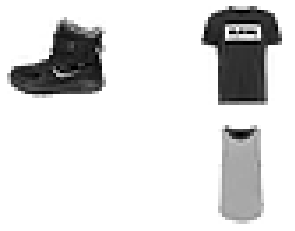

In [72]:
plt.subplot(221) ;plt.imshow(X_train[0], cmap="binary");plt.axis('off')
plt.subplot(222) ;plt.imshow(X_train[1], cmap="binary");plt.axis('off')
plt.subplot(224) ;plt.imshow(X_train[2], cmap="binary");plt.axis('off')
plt.show()


# Creating the Model Using the Sequential API

In [73]:
model = keras.models.Sequential([keras.layers.Flatten(input_shape = [28,28]),
                                 keras.layers.Dense(300,activation = 'relu'),
                                 keras.layers.Dense(100,activation = 'relu'),
                                 keras.layers.Dense(10,activation = 'softmax')
                                ])

In [74]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_7 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [76]:
model.layers 

In [81]:
weights,biases = model.layers[1].get_weights()

In [82]:
model.layers[1].name

'dense_6'

In [83]:
model.compile(loss = 'sparse_categorical_crossentropy',
             optimizer = 'sgd',
             metrics = ['accuracy'])

In [84]:
history = model.fit(X_train,y_train,epochs = 30,
                   validation_data = (X_valid,y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 11s 199us/sample - loss: 0.7193 - accuracy: 0.7632 - val_loss: 0.5068 - val_accuracy: 0.8282
Epoch 2/30
55000/55000 [==============================] - 10s 184us/sample - loss: 0.4854 - accuracy: 0.8319 - val_loss: 0.4526 - val_accuracy: 0.8406
Epoch 3/30
55000/55000 [==============================] - 10s 189us/sample - loss: 0.4407 - accuracy: 0.8461 - val_loss: 0.4199 - val_accuracy: 0.8526
Epoch 4/30
55000/55000 [==============================] - 10s 185us/sample - loss: 0.4125 - accuracy: 0.8556 - val_loss: 0.4552 - val_accuracy: 0.8388
Epoch 5/30
55000/55000 [==============================] - 10s 183us/sample - loss: 0.3955 - accuracy: 0.8608 - val_loss: 0.3926 - val_accuracy: 0.8610
Epoch 6/30
55000/55000 [==============================] - 11s 206us/sample - loss: 0.3772 - accuracy: 0.8661 - val_loss: 0.3970 - val_accuracy: 0.8570
Epoch 7/30
55000/55000 [=====================

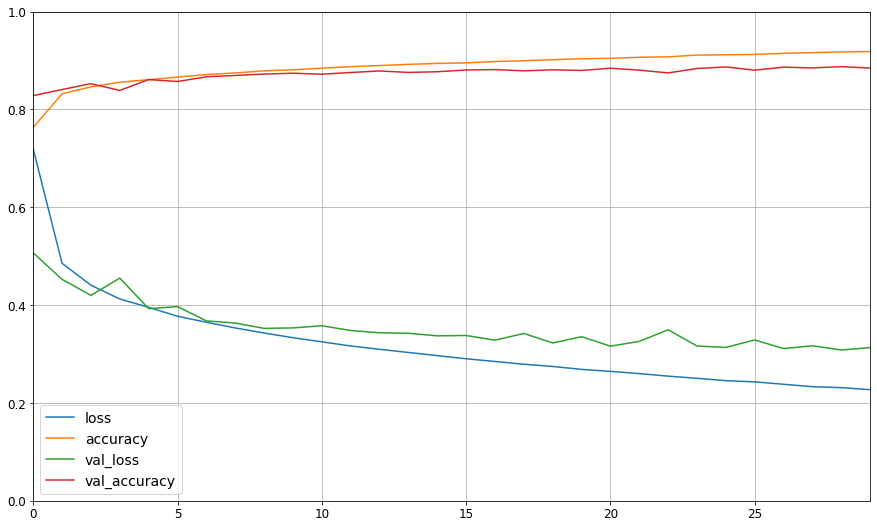

In [100]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize = (15,9))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.legend(fontsize = 14)
plt.show()

In [101]:
model.evaluate(X_test,y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[67.80151158447265, 0.8429]

# Model Predictions

In [112]:
X_new = X_test[:20]
y_proba = model.predict(X_new)
#@y_proba.round(2)
y_proba

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [113]:
y_pred = model.predict_classes(X_new)
y_pred

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 5, 3, 4, 1, 2, 2, 8, 0])

In [114]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser', 'Trouser', 'Shirt', 'Trouser',
       'Coat', 'Shirt', 'Sandal', 'Sneaker', 'Coat', 'Sandal', 'Sandal',
       'Dress', 'Coat', 'Trouser', 'Pullover', 'Pullover', 'Bag',
       'T-shirt/top'], dtype='<U11')

In [111]:
y_test[:20]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 7, 3, 4, 1, 2, 4, 8, 0],
      dtype=uint8)

# Building a Regression MLP using the Sequential API

In [164]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [116]:
housing = fetch_california_housing()

In [207]:
X_train_full,X_test,y_train_full,y_test = train_test_split(housing.data,housing.target)

In [208]:
X_train,X_valid,y_train,y_valid = train_test_split(X_train_full,y_train_full)

In [209]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.fit_transform(X_valid)
X_test_scaled = scaler.fit_transform(X_test)

In [193]:
model = keras.models.Sequential([
    
    keras.layers.Dense(30,activation = 'relu',input_shape = X_train.shape[1:]),
    keras.layers.Dense(1),
    
    ])


In [169]:
model.compile(loss = 'mean_squared_error',optimizer= 'sgd')


In [170]:
history = model.fit(X_train,y_train,validation_data= (X_valid,y_valid),epochs = 20)

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 2s 161us/sample - loss: 24976229741302735480471683072.0000 - val_loss: 2411354748658613485568.0000
Epoch 2/20
11610/11610 [==============================] - 1s 123us/sample - loss: 167835397205691662336.0000 - val_loss: 1028944632950654.8750
Epoch 3/20
11610/11610 [==============================] - 1s 123us/sample - loss: 71616702902617.0312 - val_loss: 439058464.8269
Epoch 4/20
11610/11610 [==============================] - 1s 116us/sample - loss: 30559485.9284 - val_loss: 187.2830
Epoch 5/20
11610/11610 [==============================] - 2s 131us/sample - loss: 14.3478 - val_loss: 1.2942
Epoch 6/20
11610/11610 [==============================] - 1s 118us/sample - loss: 1.3347 - val_loss: 1.2944
Epoch 7/20
11610/11610 [==============================] - 1s 118us/sample - loss: 1.3346 - val_loss: 1.2952
Epoch 8/20
11610/11610 [==============================] - 1s 119us/sample - loss

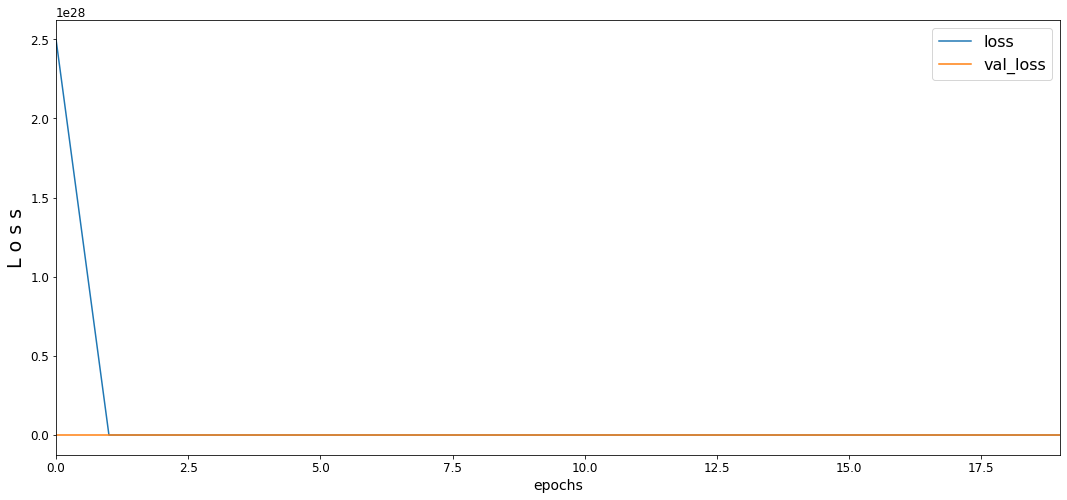

In [171]:
pd.DataFrame(history.history).plot(figsize = (18,8))
plt.legend(fontsize = 16)
plt.xlabel('epochs',fontsize = 14)
plt.ylabel('L o s s',fontsize = 19)
plt.show()

In [172]:
mse_test = model.evaluate(X_test,y_test)

5160/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [173]:
print(f'The loss on test is {mse_test}')

The loss on test is 1.352821310546047


In [174]:
X_new = X_test[:3] # pretend these are new instances

In [175]:
#X_new_scaled = scaler.fit_transform(X_new)

In [176]:
y_pred = model.predict(X_new)

In [177]:
y_pred()

array([[2.0833926],
       [2.0833926],
       [2.0833926]], dtype=float32)

In [178]:
y_test[:3]

array([1.5  , 2.201, 1.75 ])

In [219]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [220]:
input_A = keras.layers.Input(shape=[5])
input_B = keras.layers.Input(shape = [6])
hidden_1 = keras.layers.Dense(30,activation = 'relu')(input_B)
hidden_2 = keras.layers.Dense(30,activation = 'relu')(hidden_1)
concat = keras.layers.concatenate([input_A,hidden_2])

output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs = [input_A,input_B],outputs = [output])

In [221]:
X_train[1].shape
np.random.seed(42)
tf.random.set_seed(42)

In [222]:
X_train_A,X_train_B = X_train[:,:5],X_train[:,2:]
X_test_A,X_test_B = X_test[:,:5],X_test[:,2:]
X_valid_A,X_valid_B = X_valid[:,:5],X_valid[:,2:]
X_new_A,X_new_B = X_test_A[:3],X_test_B[:3]

In [223]:
model.compile(loss = 'mse',optimizer = keras.optimizers.SGD(lr= 1e-3))

In [230]:
history = model.fit((X_train_A,X_train_B),y_train,epochs = 20, validation_data = ((X_valid_A,X_valid_B),y_valid))

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 2s 153us/sample - loss: 0.4239 - val_loss: 0.3973
Epoch 2/20
11610/11610 [==============================] - 2s 134us/sample - loss: 0.4210 - val_loss: 0.3883
Epoch 3/20
11610/11610 [==============================] - 2s 145us/sample - loss: 0.4191 - val_loss: 0.4014
Epoch 4/20
11610/11610 [==============================] - 2s 150us/sample - loss: 0.4184 - val_loss: 0.3847
Epoch 5/20
11610/11610 [==============================] - 2s 156us/sample - loss: 0.4167 - val_loss: 0.3823
Epoch 6/20
11610/11610 [==============================] - 1s 129us/sample - loss: 0.4146 - val_loss: 0.3872
Epoch 7/20
11610/11610 [==============================] - 2s 138us/sample - loss: 0.4134 - val_loss: 0.3796
Epoch 8/20
11610/11610 [==============================] - 1s 126us/sample - loss: 0.4108 - val_loss: 0.3937
Epoch 9/20
11610/11610 [==============================] - 2s 135us/sample - loss: 0.411

In [231]:
mse_test = model.evaluate((X_test_A,X_test_B),y_test)
y_pred = model.predict((X_new_A,X_new_B))

5160/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [232]:
y_pred

array([[0.42848447],
       [2.025468  ],
       [3.5276952 ]], dtype=float32)

In [233]:
y_test[:3]

array([0.477  , 0.458  , 5.00001])

# Auxiliary Output

In [227]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [237]:
input_A = keras.layers.Input(shape=[5])
input_B = keras.layers.Input(shape = [6])
hidden_1 = keras.layers.Dense(30,activation = 'relu')(input_B)
hidden_2 = keras.layers.Dense(30,activation = 'relu')(hidden_1)
concat = keras.layers.concatenate([input_A,hidden_2])
output = keras.layers.Dense(1)(concat)
aux_output = keras.layers.Dense(1)(hidden_2)
model = keras.models.Model(inputs = [input_A,input_B],
                         outputs = [output, aux_output])

In [238]:
model.compile(loss = ['mse','mse'],loss_weights= [0.9,0.1],optimizer= 'sgd')

In [240]:
history = model.fit([X_train_A,X_train_B],[y_train,y_train],epochs = 20,
                   validation_data = ([X_valid_A,X_valid_B],[y_valid,y_valid]))

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 3s 255us/sample - loss: 0.9477 - dense_49_loss: 0.8361 - dense_50_loss: 1.9485 - val_loss: 1.5294 - val_dense_49_loss: 1.2624 - val_dense_50_loss: 3.9266
Epoch 2/20
11610/11610 [==============================] - 2s 160us/sample - loss: 0.5617 - dense_49_loss: 0.5051 - dense_50_loss: 1.0726 - val_loss: 0.6436 - val_dense_49_loss: 0.4416 - val_dense_50_loss: 2.4596
Epoch 3/20
11610/11610 [==============================] - 2s 164us/sample - loss: 0.4808 - dense_49_loss: 0.4389 - dense_50_loss: 0.8573 - val_loss: 0.4955 - val_dense_49_loss: 0.3941 - val_dense_50_loss: 1.4068
Epoch 4/20
11610/11610 [==============================] - 2s 166us/sample - loss: 0.4472 - dense_49_loss: 0.4198 - dense_50_loss: 0.6930 - val_loss: 0.4353 - val_dense_49_loss: 0.3805 - val_dense_50_loss: 0.9269
Epoch 5/20
11610/11610 [==============================] - 2s 164us/sample - loss: 0.4340 - dense_49_los

In [241]:
total_loss,main_loss,aux_loss = model.evaluate([X_test_A,X_test_B],[y_test,y_test])

5160/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [242]:
y_pred_main,y_pred_aux = model.predict([X_new_A,X_new_B])

# Building  Dynamic Models Using Subclass API

In [245]:
class WideAndDeepModel(keras.models.Model):
    
    def __init__(self,units = 30 , activation = 'relu',**kwargs):
        super().__init__(**kwargs) # handels standard args (e.g. name)
        self.hidden1 = keras.layers.Dense(units,activation= activation)
        self.hideen2 = keras.layers.Dense(units,activation = activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
        
    def call(self,inputs):
        input_A,input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.Concatenate([input_A,hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output,aux_output

model = WideAndDeepModel()
        

In [247]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])


model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)


model.save('my_keras_model.h5')

Train on 11610 samples, validate on 3870 samples
Epoch 1/10
11610/11610 [==============================] - 2s 184us/sample - loss: 1.5135 - val_loss: 1.5166
Epoch 2/10
11610/11610 [==============================] - 2s 190us/sample - loss: 0.6735 - val_loss: 0.6772
Epoch 3/10
11610/11610 [==============================] - 2s 139us/sample - loss: 0.6164 - val_loss: 0.5764
Epoch 4/10
11610/11610 [==============================] - 2s 172us/sample - loss: 0.5770 - val_loss: 0.5460
Epoch 5/10
11610/11610 [==============================] - 2s 144us/sample - loss: 0.5455 - val_loss: 0.5081
Epoch 6/10
11610/11610 [==============================] - 2s 176us/sample - loss: 0.5186 - val_loss: 0.4876
Epoch 7/10
11610/11610 [==============================] - 2s 143us/sample - loss: 0.4966 - val_loss: 0.4633
Epoch 8/10
11610/11610 [==============================] - 2s 168us/sample - loss: 0.4792 - val_loss: 0.4442
Epoch 9/10
11610/11610 [==============================] - 1s 128us/sample - loss: 0.464

In [248]:
model.save("my_keras_model.h5")

In [249]:
model = keras.models.load_model("my_keras_model.h5")

In [250]:
model.predict(X_new)

array([[205.71388],
       [350.554  ],
       [186.04434]], dtype=float32)

In [251]:
model.save_weights("my_keras_weights.ckpt")

In [252]:
model.load_weights("my_keras_weights.ckpt")

# Using Callbacks

In [255]:
# after Build and Compile
checkpoint_cb  = keras.callbacks.ModelCheckpoint('my_keras_model.h5')
history = model.fit(X_train,y_train,epochs = 10 , callbacks = [checkpoint_cb])

Train on 11610 samples
Epoch 1/10
11610/11610 [==============================] - 2s 140us/sample - loss: 0.4407
Epoch 2/10
11610/11610 [==============================] - 1s 109us/sample - loss: 0.4321
Epoch 3/10
11610/11610 [==============================] - 1s 117us/sample - loss: 0.4248
Epoch 4/10
11610/11610 [==============================] - 1s 103us/sample - loss: 0.4187
Epoch 5/10
11610/11610 [==============================] - 1s 100us/sample - loss: 0.4135
Epoch 6/10
11610/11610 [==============================] - 2s 136us/sample - loss: 0.4086
Epoch 7/10
11610/11610 [==============================] - 1s 124us/sample - loss: 0.4042
Epoch 8/10
11610/11610 [==============================] - 1s 111us/sample - loss: 0.4009
Epoch 9/10
11610/11610 [==============================] - 1s 111us/sample - loss: 0.3978
Epoch 10/10
11610/11610 [==============================] - 2s 134us/sample - loss: 0.3947


In [256]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

In [257]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb])
model = keras.models.load_model("my_keras_model.h5") # rollback to best model
mse_test = model.evaluate(X_test, y_test)

Train on 11610 samples, validate on 3870 samples
Epoch 1/10
11610/11610 [==============================] - 2s 193us/sample - loss: 1.6551 - val_loss: 1.0219
Epoch 2/10
11610/11610 [==============================] - 2s 147us/sample - loss: 0.7122 - val_loss: 0.6432
Epoch 3/10
11610/11610 [==============================] - 2s 145us/sample - loss: 0.6377 - val_loss: 0.5846
Epoch 4/10
11610/11610 [==============================] - 2s 152us/sample - loss: 0.5870 - val_loss: 0.5381
Epoch 5/10
11610/11610 [==============================] - 2s 148us/sample - loss: 0.5454 - val_loss: 0.5170
Epoch 6/10
11610/11610 [==============================] - 2s 153us/sample - loss: 0.5105 - val_loss: 0.4704
Epoch 7/10
11610/11610 [==============================] - 2s 144us/sample - loss: 0.4832 - val_loss: 0.4558
Epoch 8/10
11610/11610 [==============================] - 2s 147us/sample - loss: 0.4626 - val_loss: 0.4432
Epoch 9/10
11610/11610 [==============================] - 2s 142us/sample - loss: 0.446

# early Stopping

In [259]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 10, restore_best_weights= True)
history = model.fit(X_train,y_train, epochs = 100, validation_data = (X_valid,y_valid),
                   callbacks = [checkpoint_cb,early_stopping_cb])

Train on 11610 samples, validate on 3870 samples
Epoch 1/100
11610/11610 [==============================] - 2s 144us/sample - loss: 0.3889 - val_loss: 0.4207
Epoch 2/100
11610/11610 [==============================] - 2s 136us/sample - loss: 0.3865 - val_loss: 0.3720
Epoch 3/100
11610/11610 [==============================] - 2s 138us/sample - loss: 0.3840 - val_loss: 0.3850
Epoch 4/100
11610/11610 [==============================] - 1s 124us/sample - loss: 0.3818 - val_loss: 0.4038
Epoch 5/100
11610/11610 [==============================] - 2s 152us/sample - loss: 0.3799 - val_loss: 0.3825
Epoch 6/100
11610/11610 [==============================] - 2s 155us/sample - loss: 0.3777 - val_loss: 0.4135
Epoch 7/100
11610/11610 [==============================] - 2s 137us/sample - loss: 0.3758 - val_loss: 0.3847
Epoch 8/100
11610/11610 [==============================] - 2s 152us/sample - loss: 0.3744 - val_loss: 0.4435
Epoch 9/100
11610/11610 [==============================] - 2s 160us/sample - lo

In [263]:
# custom Evaluations 
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs):
        print('\nval/train: {:.2f}'.format(logs['val_loss']/loss['loss']))

# Visualization Using TensorBoard

In [264]:
root_logdir = os.path.join(os.curdir , 'my_logs')

In [266]:
def get_run_logdir():
    import time
    run_id = time.strftime('run_%Y_%m_%d-%H_%M_%S')
    return os.path.join(root_logdir,run_id) 

In [267]:
run_logdir = get_run_logdir()

In [268]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [269]:
run_logdir

'./my_logs/run_2019_12_19-17_45_47'

In [270]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

In [271]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

In [272]:
history  = model.fit(X_train,y_train,epochs = 30,
                     validation_data = (X_valid,y_valid),
                    callbacks = [tensorboard_cb])


Train on 11610 samples, validate on 3870 samples
Epoch 1/30
11610/11610 [==============================] - 2s 191us/sample - loss: 1.8631 - val_loss: 3.2403
Epoch 2/30
11610/11610 [==============================] - 1s 126us/sample - loss: 0.6723 - val_loss: 0.6939
Epoch 3/30
11610/11610 [==============================] - 2s 140us/sample - loss: 0.5927 - val_loss: 0.5531
Epoch 4/30
11610/11610 [==============================] - 2s 132us/sample - loss: 0.5550 - val_loss: 0.5519
Epoch 5/30
11610/11610 [==============================] - 2s 145us/sample - loss: 0.5278 - val_loss: 0.5715
Epoch 6/30
11610/11610 [==============================] - 2s 171us/sample - loss: 0.5032 - val_loss: 0.5591
Epoch 7/30
11610/11610 [==============================] - 2s 152us/sample - loss: 0.4863 - val_loss: 0.4593
Epoch 8/30
11610/11610 [==============================] - 2s 158us/sample - loss: 0.4701 - val_loss: 0.4651
Epoch 9/30
11610/11610 [==============================] - 2s 145us/sample - loss: 0.458

In [1]:
import numpy as np

In [4]:
?np.linalg.norm